In [21]:
#!pip install skfeature-chappers

In [22]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv("Prepared_Dataset_By_VASU_N2.csv",index_col=0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291449 entries, 0 to 291450
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CreditScore           291449 non-null  float64
 1   FirstTimeHomebuyer    291449 non-null  int64  
 2   MSA                   291449 non-null  int64  
 3   MIP                   291449 non-null  int64  
 4   Units                 291449 non-null  int64  
 5   Occupancy             291449 non-null  object 
 6   OCLTV                 291449 non-null  int64  
 7   DTI                   291449 non-null  float64
 8   OrigUPB               291449 non-null  int64  
 9   LTV                   291449 non-null  float64
 10  OrigInterestRate      291449 non-null  float64
 11  Channel               291449 non-null  object 
 12  PPM                   291449 non-null  int64  
 13  PropertyState         291449 non-null  object 
 14  PropertyType          291449 non-null  object 
 15  LoanP

In [25]:
df.drop(['C_FirstPaymentDate','C_MaturityDate'],axis=1,inplace=True)

In [26]:
df.head()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,...,FirstPaymentYear,FirstPaymentMonth,Maturity_Year,Maturity_Month,LTV_range,Credit_range,YearsInRepayment,Repay_range,IsFirstTimeHomeBuyer,Duration
0,711.841009,0,16974,25,1,O,89,27.0,117000,89.0,...,1999,2,2029,1,High,Good,4.333333,2,No,30
1,711.841009,0,19740,0,1,O,73,17.0,109000,73.0,...,1999,2,2029,1,High,Good,12.000000,4,No,30
2,711.841009,0,29940,0,1,O,75,16.0,88000,75.0,...,1999,2,2029,1,High,Good,5.583333,2,No,30
3,711.841009,0,31084,0,1,O,76,14.0,160000,76.0,...,1999,2,2029,1,High,Good,2.916667,1,No,30
4,711.841009,0,35644,0,1,O,78,18.0,109000,78.0,...,1999,2,2029,1,High,Good,4.500000,2,No,30


In [27]:
df.shape

(291449, 33)

In [28]:
df.columns

Index(['CreditScore', 'FirstTimeHomebuyer', 'MSA', 'MIP', 'Units', 'Occupancy',
       'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'Channel', 'PPM',
       'PropertyState', 'PropertyType', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment', 'FirstPaymentYear',
       'FirstPaymentMonth', 'Maturity_Year', 'Maturity_Month', 'LTV_range',
       'Credit_range', 'YearsInRepayment', 'Repay_range',
       'IsFirstTimeHomeBuyer', 'Duration'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291449 entries, 0 to 291450
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CreditScore           291449 non-null  float64
 1   FirstTimeHomebuyer    291449 non-null  int64  
 2   MSA                   291449 non-null  int64  
 3   MIP                   291449 non-null  int64  
 4   Units                 291449 non-null  int64  
 5   Occupancy             291449 non-null  object 
 6   OCLTV                 291449 non-null  int64  
 7   DTI                   291449 non-null  float64
 8   OrigUPB               291449 non-null  int64  
 9   LTV                   291449 non-null  float64
 10  OrigInterestRate      291449 non-null  float64
 11  Channel               291449 non-null  object 
 12  PPM                   291449 non-null  int64  
 13  PropertyState         291449 non-null  object 
 14  PropertyType          291449 non-null  object 
 15  LoanP

In [30]:
target='EverDelinquent'
binary_cols=['PPM', 'NumBorrowers']
numeric_cols=df.select_dtypes(include=['float','int']).columns.tolist()
numeric_cols=[i for i in numeric_cols if i not in binary_cols]
numeric_cols.remove(target)
numeric_cols.remove('MonthsDelinquent')
categ_cols=df.select_dtypes(include=['object']).columns.tolist()
len(numeric_cols)+len(categ_cols)+len(binary_cols)

31

In [31]:
y=df['EverDelinquent']
X=df.drop('EverDelinquent',axis=1)

In [32]:
categ_data=pd.get_dummies(X[categ_cols])
binary_data=X[binary_cols]
combined_data=pd.concat([categ_data,binary_data],axis=1)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()

In [35]:
numeric_data=sc.fit_transform(X[numeric_cols])

In [36]:
X_combined=np.concatenate([numeric_data,combined_data],axis=1)

In [37]:
from sklearn.decomposition import PCA
pca=PCA()
X_pca=pca.fit_transform(X_combined)
component_name=[f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca=pd.DataFrame(X_pca,columns=component_name)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74
0,-0.596866,-1.159089,0.620106,-3.185871,0.230846,-0.545542,0.366345,-0.892142,0.856404,-0.033930,...,-4.006136e-17,-4.775355e-14,-4.940983e-14,-2.687146e-14,7.158975e-15,-1.661075e-15,3.252453e-16,1.171018e-14,3.945039e-15,-7.490869e-16
1,3.513477,-1.111913,1.471395,-2.753451,0.294442,-0.340660,0.250152,-0.889609,0.595651,-0.017853,...,6.564238e-17,1.005869e-16,4.791839e-18,-4.890870e-18,4.735982e-18,-8.320337e-18,-6.219722e-18,-8.002036e-18,8.967257e-18,-9.918557e-19
2,1.286039,-0.572198,-0.534672,-2.818151,0.061962,-1.021150,0.382216,-0.296283,-0.019296,0.849431,...,1.224835e-15,-1.383071e-15,-5.412894e-16,5.304425e-16,2.259072e-16,-7.541871e-16,8.624055e-17,-8.530694e-16,-3.541926e-18,-3.459568e-18
3,0.149214,-0.243546,-1.502252,-3.009152,0.108770,-0.412966,0.036917,-0.101497,0.066118,0.871811,...,4.024375e-15,-3.006323e-15,4.223857e-15,5.982993e-15,-5.171565e-16,1.143233e-15,-1.948369e-15,2.065906e-15,1.213362e-15,5.877391e-17
4,0.761771,-0.520775,-0.583669,-2.670708,-0.098656,-1.031454,0.407764,0.207223,-0.264427,1.201851,...,-3.241577e-16,-2.538393e-16,-4.057207e-15,-3.780954e-15,1.992452e-15,-1.169700e-15,-6.245196e-17,7.840579e-16,2.348792e-15,1.994237e-16


In [38]:
loadings=pd.DataFrame(
    pca.components_.T,
    columns=component_name,
    index=numeric_cols+combined_data.columns.tolist()
)

In [39]:
loadings.iloc[:15,:15]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
CreditScore,0.137467,0.072322,-0.157846,-0.003101,0.565715,0.164692,-0.227108,0.018322,0.210780,0.208378,0.525521,0.141069,-0.028192,-0.051951,0.001822
FirstTimeHomebuyer,-0.149220,-0.080466,0.185503,0.035821,0.505929,-0.049992,0.077016,0.444265,-0.226808,-0.391856,-0.224056,0.104600,0.056158,-0.127502,0.027643
MSA,0.013482,0.019347,-0.057803,0.005052,-0.140055,0.217219,-0.218323,0.486036,-0.554468,0.512582,0.021762,-0.215766,-0.038692,-0.031344,0.033583
MIP,-0.327773,-0.139423,0.302790,-0.068334,0.062880,-0.030201,-0.009181,-0.026750,0.027013,0.139729,0.097627,-0.061448,0.066958,0.742235,0.275971
Units,0.029535,0.004318,-0.016722,0.034105,-0.127995,-0.030121,0.064198,0.600232,0.709705,0.077271,-0.089263,-0.301277,0.037815,0.001603,0.005409
OCLTV,-0.377071,-0.159603,0.343179,-0.088041,-0.013336,0.075638,-0.077898,-0.097946,0.096551,0.165486,0.068391,-0.031646,-0.013375,-0.308140,-0.101083
DTI,-0.098054,-0.028593,0.035834,0.043771,-0.371529,0.229232,0.051800,0.190272,-0.111397,-0.535120,0.659508,-0.078464,-0.047443,0.010747,-0.025339
OrigUPB,-0.138641,0.025295,-0.105053,-0.082841,-0.160968,0.574463,-0.290052,0.079685,0.178629,-0.112623,-0.296511,0.541561,-0.187776,0.110918,0.027034
LTV,-0.377288,-0.159618,0.343239,-0.088146,-0.013315,0.075034,-0.077743,-0.097621,0.096219,0.165983,0.068392,-0.031910,-0.011959,-0.306504,-0.100334
OrigInterestRate,-0.130354,0.007130,0.017347,0.239875,-0.194504,-0.447256,0.244517,0.244600,-0.011334,0.256262,0.200324,0.662475,-0.070298,-0.009886,-0.065062


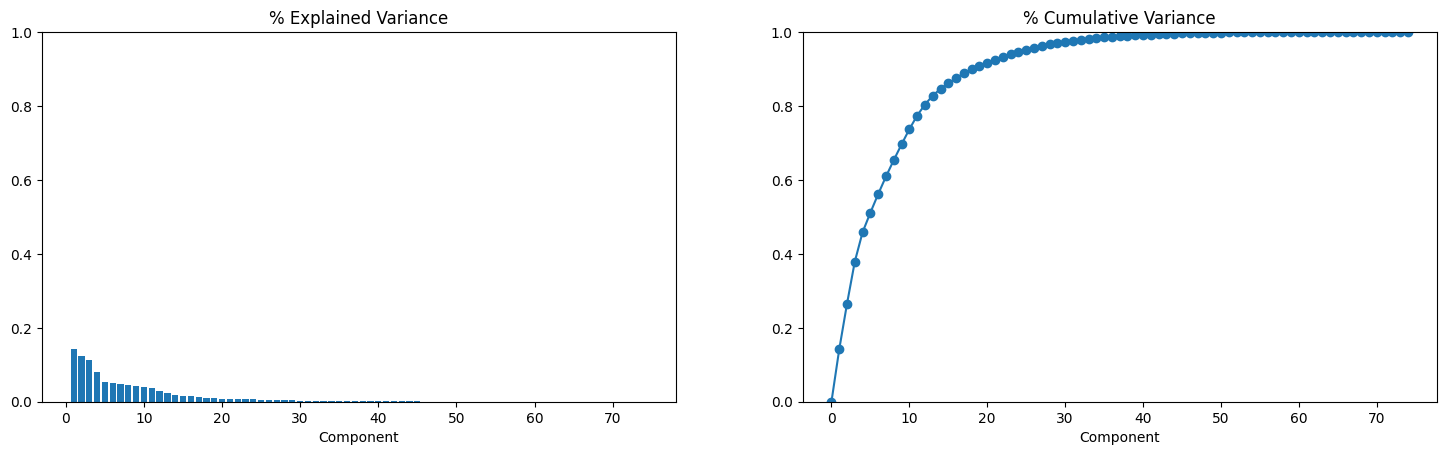

In [40]:
def plot_variance(pca, width=16, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=18, dpi=100)
    return axs

# Look at explained variance
plot_variance(pca);

In [41]:
num_components=np.argmax(np.cumsum(pca.explained_variance_ratio_)>=0.80)+1
num_components

12

In [42]:
pca_final=PCA(n_components=num_components)
X_pca_final=pca_final.fit_transform(X_combined)
components_name=[f"PC{i+1}" for i in range(X_pca_final.shape[1])]
X_pca_final=pd.DataFrame(X_pca_final,columns=components_name)

In [43]:
X_pca_final.to_csv("X_pca_final_by_vasu.csv")

In [47]:
for col in X.select_dtypes("object"):
    X[col],_=X[col].factorize()

discrete_features=X.dtypes == int

In [ ]:
X.info()

In [ ]:
numeric_data=df.select_dtypes(include=['int64','float64'])
corr=numeric_data.corr()
print(corr['EverDelinquent'].sort_values(ascending=False))

In [ ]:
def plot_heatmap(df, title):
    # Create a mask for the diagonal elements
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r
    plt.figure(figsize=(32, 32))

    # Set the title and font properties
    plt.title(f'{title} Heatmap', fontweight='bold', y=1.02, size=24)

    # Plot the heatmap with the masked diagonal elements
    sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 14, "weight": "bold"},
                mask=mask)

plot_heatmap(numeric_data, title='Correlation')

In [ ]:
threshold=0.06
abs_corr_to_target=abs(corr['EverDelinquent'])
filtered=abs_corr_to_target[abs_corr_to_target > threshold].sort_values(ascending=False)

In [ ]:
filtered

In [ ]:
filtered.index.tolist()

In [ ]:
most_corr_features=['MonthsDelinquent',
 'CreditScore',
 'YearsInRepayment',
 'MonthsInRepayment',
 'Repay_range',
 'NumBorrowers',
 'OrigUPB',
 'LTV',
 'OCLTV',
 'OrigInterestRate']
X_correlated=X[most_corr_features]
X_correlated.head()

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2, VarianceThreshold

In [ ]:
def mi_score(X,y,discrete_features):
    mi_scores=mutual_info_classif(X,y,discrete_features=discrete_features)
    mi_scores=pd.Series(mi_scores,name="MI Scores",index=X.columns)
    mi_scores=mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores=mi_score(X,y,discrete_features)
mi_scores

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(10, 10))
plot_mi_scores(mi_scores)

In [ ]:
best_mi_cols=mi_scores.index.tolist()[:15]
best_mi_cols

In [ ]:
X_best_mi_scores=X[best_mi_cols]
X_best_mi_scores.to_csv("X_best_mi_scores.csv")
X_best_mi_scores.shape

In [ ]:
X_cat=X.astype(int)

In [ ]:
chi2_features=SelectKBest(chi2,k=15)
X_chi2_best=chi2_features.fit_transform(X_cat,y)

In [ ]:
X_chi2_best=pd.DataFrame(X_chi2_best,columns=X_cat.columns.to_list()[:15])

In [ ]:
print('Original number of features:', X_cat.shape[1])
print('Reduced number of features:', X_chi2_best.shape[1])

In [ ]:
X_chi2_best.columns.to_list()

In [ ]:
X_chi2_best.to_csv("X_chi2_best.csv")
X_chi2_best.shape

In [ ]:
var=VarianceThreshold(threshold=0)
var.fit(X)

In [ ]:
sum(var.get_support())

In [ ]:
print(
    len([
        x for x in X.columns
        if x not in X.columns[var.get_support()]
    ]))

[x for x in X.columns if x not in X.columns[var.get_support()]]

In [ ]:
from skfeature.function.similarity_based import fisher_score

In [ ]:
X.to_csv("X_full.csv")

In [ ]:
best_cols = ['Credit_range', 'Repay_range', 'LTV_range', 'FirstTimeHomebuyer', 'NumBorrowers',
             'MonthsInRepayment', 'OrigUPB', 'OrigInterestRate', 'MIP', 'Maturity_Year', 'FirstPaymentYear','MSA', 'Occupancy', 
             'DTI']
len(best_cols)

In [ ]:
X_best_features=X[best_cols]
X_best_features.to_csv("X_best_features.csv")